Neural Network
---
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import pickle

Visualization
---

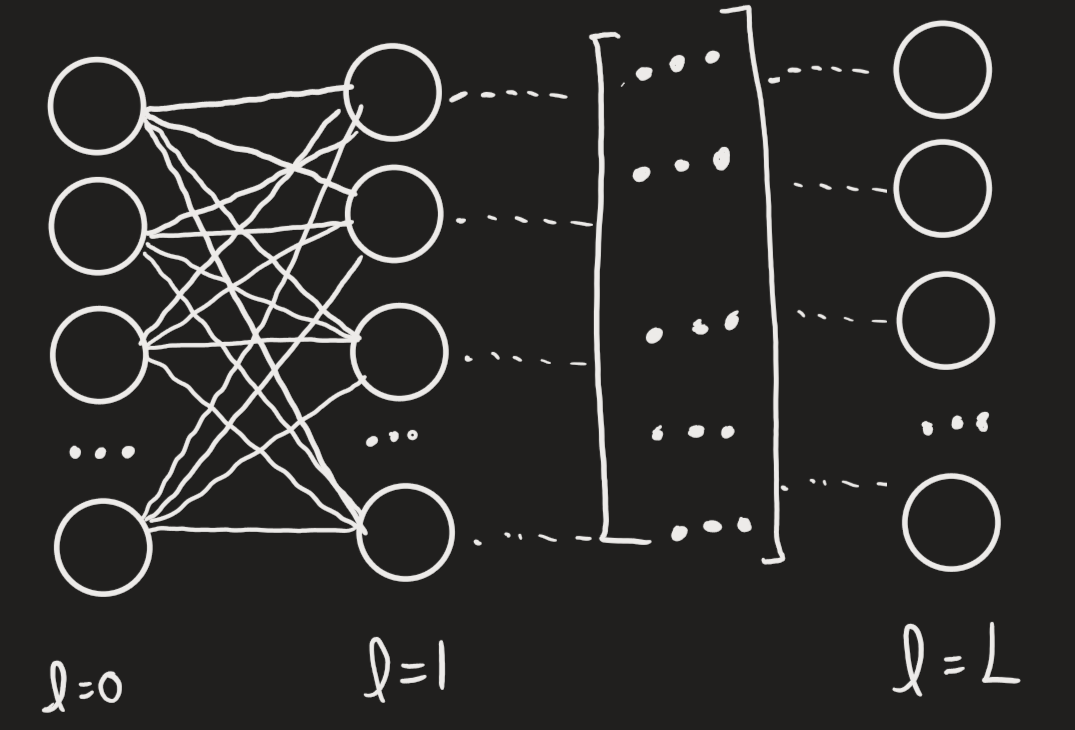

Notation
---

ℓ represents the layer of the network.

L represnts the last or output layer of the network.

The vector aℓ represents the actual values held in the neurons of layer ℓ.

a^ℓ_n represents the value of the nth neuron of the ℓth layer.

The vector y represents the expected values of the output layer of the network, La

The vector ℓz represnts the weighted sums calculated using ℓ-1a.

Nℓ represents the number of neurons in layer ℓ.

W^ℓ_{c → d} represents the weight in layer ℓ connecing neuron c of layer ℓ-1 to neron d of layer ℓ.

ℓbn represents the bias of neuron n in layer ℓ.

W is the weight tensor while ℓW is the weight matrix corresponding to layer ℓ.

τ is the amount of training data avaliable to the network.

α is the learing rate of the neural network.

Derivations
---

Traversing Neural Network
---

The weighted sum value of the nth neuron in layer ℓ a^ℓ_n is:

\begin{equation*}
{z_n^\ell} = {b_n^\ell} + \sum_{k=1}^{N_{ℓ-1}} {W_{k \rightarrow n}^\ell} {a_k^{ℓ-1}}
\end{equation*}

Or using vector notation for W and ℓ-1a:

\begin{equation*}
{z_n^\ell} = {b_n^\ell} + {(W_n^\ell)}^T {a^{ℓ-1}}
\end{equation*}

\begin{equation*}
{z_n^\ell} = {b_n^\ell} + \vec{W_n^\ell}·\vec{a^{ℓ-1}}
\end{equation*}

Therefore, the entire z vector can be found through a series of dot products, or a matrix vector product.

\begin{equation*}
\vec{z_\ell} = W_\ell\vec{a_{ℓ-1}} + \vec{b_\ell}
\end{equation*}

Where:

\begin{equation*}
W_ℓ = \begin{bmatrix}
{W_{1 \rightarrow 1}^\ell}  &  {W_{2 \rightarrow 1}^\ell}  &  {W_{3 \rightarrow 1}^\ell} & ... & {W_{N_{ℓ-1} \rightarrow 1}^\ell}\\
{W_{1 \rightarrow 2}^\ell}  &  {W_{2 \rightarrow 2}^\ell} &  {W_{3 \rightarrow 2}^\ell} & ... & {W_{N_{ℓ-1} \rightarrow 2}^\ell}\\
{W_{1 \rightarrow 3}^\ell}  & {W_{2 \rightarrow 3}^\ell}  &  {W_{3 \rightarrow 3}^\ell} & ... & {W_{N_{ℓ-1} \rightarrow 3}^\ell}\\
...& ...  & ... & ...  & ...\\
{W_{1 \rightarrow N_ℓ}^\ell}  & {W_{2 \rightarrow N_ℓ}^\ell}  & {W_{3 \rightarrow N_ℓ}^\ell} & ... & {W_{N_{ℓ-1} \rightarrow N_ℓ}^\ell}\\
\end{bmatrix}
\end{equation*}

\begin{equation*}
W_\ell ∈ \mathbb{R}^{N_{ℓ} × N_{ℓ-1}}
\end{equation*}

\begin{equation*}
\vec{b_\ell} = \begin{bmatrix}b_1^\ell\\ b_2^\ell \\b_3^\ell\\ ...\\b_{N_ℓ}^\ell \end{bmatrix}
\end{equation*}

\begin{equation*}
\vec{ b_ℓ} ∈ \mathbb{R}^{N_{ℓ}}
\end{equation*}

The value of aℓ is found from zℓ by plugging zℓ into a σ function.

\begin{equation*}
\vec{a_\ell} = σ(\vec{z_\ell})
\end{equation*}

\begin{equation*}
σ(x) = \frac{1}{1+e^{-x}}
\end{equation*}

Backpropogation
---

In order to optimize the networks performance, there must be a quantatative loss value to minimize.
The Cost C for any single training example can be expressed:
\begin{equation*}
C = \sum_{n=0}^{N_L-1}(a_{L_n} - y_n)^2
\end{equation*}
If θ is a vector of all model params (weights and biases), than a single
iteration of gradient descent entails:

\begin{equation*}
\hat{θ} = \begin{bmatrix} W_1\\ b_1 \\ W_2\\ b_2\\... \end{bmatrix}
\end{equation*}
\begin{equation*}
\hat{θ} ← \hat{θ} - α\vec{∇}C
\end{equation*}

\begin{equation*}
\vec{∇}C = \begin{bmatrix}\frac{∂C}{∂W_1}\\ \frac{∂C}{∂b_1} \\ \frac{∂C}{∂W_2}\\ \frac{∂C}{∂b_2}\\... \end{bmatrix}
\end{equation*}

Therefore, any model param x is updated as:
\begin{equation*}
x← x - α\frac{∂C}{∂x}
\end{equation*}

The question now shifts to calculating this partial derivative. By chain rule ...

\begin{equation*}
\frac{∂C}{∂x} = \frac{∂C}{∂a_{L_n}}\frac{∂a_{L_n}}{∂z_{L_n}}\frac{∂z_{L_n}}{∂a_{{L-1}_n}}...\frac{∂z*{ℓ}}{∂x}
\end{equation*}

\begin{equation*}
\frac{∂C}{∂x} = \sum_{n=0}^{N_L - 1}2(a_{L_n} - y_n)σ'(z_{L_n})\sum W ...
\end{equation*}

The problem simplifies dramatically if vector notation is used ...
\begin{equation*}
\vec{δ} = \vec{a_L} - \vec{y}
\end{equation*}

\begin{equation*}
\sqrt{C} = |\vec{δ}|
\end{equation*}

We will use the scalar derivations made above to vectorize the derivatives.\
\begin{equation*}
\frac{∂C}{∂W_L} = [\vec{δ} * σ'(\vec{z_L})]\vec{a_{L-1}^T}
\end{equation*}

\begin{equation*}
\vec{\frac{∂C}{∂b_L}} = \vec{δ} * σ'(\vec{z_L})
\end{equation*}

\begin{equation*}
\frac{∂C}{∂W_{L-1}} = [W^T_L[\vec{δ} * σ'(\vec{z_L})] * σ'(\vec{z_{L-1}})]\vec{a^T_{L-2}}
\end{equation*}

\begin{equation*}
\vec{\frac{∂C}{∂b_{L-1}}} = W^T_L[\vec{δ} * σ'(\vec{z_L})] * σ'(\vec{z_{L-1}})
\end{equation*}

To represent the chain rule relation across any number over layers, it makes sense to introduce a recursive variable dC/dz.

\begin{equation*}
\vec{\frac{∂C}{∂z_ℓ}} = W^T_{ℓ+1}\vec{\frac{∂C}{∂z_{ℓ+1}}} * σ'(\vec{z_{ℓ}})
\end{equation*}

Where the base case is ...
\begin{equation*}
\vec{\frac{∂C}{∂z_L}} = \vec{δ} * σ'(\vec{z_{L}})
\end{equation*}

This is the derivative of z_L in vector notation. Everything being done is simply a different representation of the derivatves in scalar notation.

With this recurrsive definition (and now including avg gradients; . There are now 4 (or 6) key equations which govern all of training via gradient descent, they are...

## \begin{equation*}
...
\end{equation*}

* * *

\begin{equation*}
\vec{\frac{∂C}{∂z_L}} = \vec{δ} * σ'(\vec{z_{L}})
\end{equation*}

\begin{equation*}
\vec{\frac{∂C}{∂z_ℓ}} = W^T_{ℓ+1}\vec{\frac{∂C}{∂z_{ℓ+1}}} * σ'(\vec{z_{ℓ}})
\end{equation*}

\begin{equation*}
\frac{∂C}{∂W_ℓ} = \frac{1}{τ}\sum \vec{\frac{∂C}{∂z_ℓ}}a^T_{ℓ-1}
\end{equation*}

\begin{equation*}
\vec{\frac{∂C}{∂b_ℓ}} = \frac{1}{τ}\sum \vec{\frac{∂C}{∂z_ℓ}}
\end{equation*}

* * *

\begin{equation*}
W_ℓ ← W_ℓ - α\frac{∂C}{∂W_ℓ}
\end{equation*}

\begin{equation*}
\vec{b_ℓ} ← \vec{b_ℓ} - α\vec{\frac{∂C}{∂b_ℓ}}
\end{equation*}

Footnote: Model Compression
---

Matrix multiplications with dense weight matricies can be computationally expensive and cause a considerable time latency. To solve this problem, the model can be compressed. In the same way an images RGB matricies are compressed using SVD, a neural networks weight matricies can be compressed using SVD.
Recall SVD factors a matrix A:
\begin{equation*}
A = UΣV^T
\end{equation*}
Where U and V^T are orthogonal, and Σ is semi-diagonal. V is the eigen vecotr matrix for A^TA, Σ is made up of single values σ for A^TA, σ = sqrt(λ), and the columns of U are calculted from U_i = Av_i/σ_i:

\begin{equation*}
A^TA\vec{v} = λ\vec{v}
\end{equation*}

\begin{equation*}
σ = \sqrt{λ}
\end{equation*}

\begin{equation*}
A^TA\vec{v} = σ^2\vec{v}
\end{equation*}

\begin{equation*}
V =
\begin{bmatrix}
~  &  ~  &  ~  \\
v_1  &  v_2 &  ... & v_n \\
~  & ~  &  ~ \\
\end{bmatrix}
\end{equation*}

\begin{equation*}
Σ =
\begin{bmatrix}
σ_1  &  0  &  0 & ... & 0 & 0&...\\
0  &  σ_2 &  0 & ... & 0 & 0&...\\
0  & 0  &  σ_3& ... & 0&0&...\\
...& ...  & ... & ...  & ...&0&...\\
0  & 0  & 0 & ... & σ_n&0&...\\
\end{bmatrix} = \begin{bmatrix}
\sqrt{λ_1}  &  0  &  0 & ... & 0 & 0&...\\
0  &  \sqrt{λ_2} &  0 & ... & 0 & 0&...\\
0  & 0  &  \sqrt{λ_3}& ... & 0&0&...\\
...& ...  & ... & ...  & ...&0&...\\
0  & 0  & 0 & ... & \sqrt{λ_n}&0&...\\
\end{bmatrix}
\end{equation*}

\begin{equation*}
U =
\begin{bmatrix}
~  &  ~  &  ~  \\
\frac{Av_1}{σ_1}  &  \frac{Av_2}{σ_2} &  ... & \frac{Av_n}{σ_n} \\
~  & ~  &  ~ \\
\end{bmatrix}
\end{equation*}

Recall a symetric matrix (A^TA) will always have real non-negative eigenvalues (λ)

Compression occurs when dropping the smallest σ from Σ and multiplying the vectors by each of the 3 smaller rank matricies.

\begin{equation*}
W ∈ ℜ^{m × n}
\end{equation*}

\begin{equation*}
W\vec{a} : O(mn)
\end{equation*}

If the largest k singularvalues are kept.

\begin{equation*}
\vec{a}V^TΣU : O(nk + k^2 + mk )
\end{equation*}

Big O complextity is greatly reducued espicially when:

\begin{equation*}
k <<< m,n
\end{equation*}

Implementation of Network Starts Below
---

In [2]:
# @title Neural Network

class Neural_Network:
  def __init__(self, architecture, activations=None):
    self.architecture = architecture # architecture is list of model composition where  if x = architecture[i]; layer i has x neurons
    self.L = len(architecture)  # L is number of layers
    self.W, self.b = self.init_random_params() # start off with random weights and biases
    self.f, self.f_prime = self.init_activation_functions(activations) # get arrays for activation functions / derivatives used for each layer

  def init_random_params(self):  # Initialize weights and biases
    W_tensor = []
    b_matrix = []
    #np.random.seed(42)
    for i in range(self.L - 1):
      W_tensor.append(np.random.randn(self.architecture[i+1], self.architecture[i]))
      b_matrix.append(np.random.randn(self.architecture[i+1], 1))
    return W_tensor, b_matrix

  def set_params(self, W, b):
    self.W = W
    self.b = b

  def init_activation_functions(self, activations):
    function_map, derivative_map = self.get_index_function_maps()
    if activations is None:
      return [function_map[0]] * self.L, [derivative_map[0]] * self.L
    else:
      return [function_map[i] for i in activations], [derivative_map[i] for i in activations]

  def get_index_function_maps(self):   # int -> function
    #HARDCODED, ADD NEW ACTIVATION FUNCTIONS TO DICT
    function_map = {
        0: self.sigmoid,
        1: self.relu,
        2: self.logistic_arctan,
        3: self.linear,
        4: self.tanh
    }
    derivative_map = {
        0: self.sigmoid_prime,
        1: self.relu_prime,
        2: self.logistic_arctan_prime,
        3: self.linear_prime,
        4: self.tanh_prime
    }
    return function_map, derivative_map


  def run(self, a, backprop=False): # return output of network for input vector a
    a = np.array(a).reshape(-1, 1)
    A,Z = [a],[]
    for W, b, f in zip(self.W, self.b, self.f):
      z = np.dot(W,a) + b  # vector
      Z.append(z)
      a = f(z)   # vector
      A.append(a)
    if backprop:
      return A,Z
    return a

  def train(self, X, Y, alpha=0.5, epochs=800, stochastic_const=1, show_cost=True): # train network using gradient descent
    X, Y = np.array(X), np.array(Y)  # make X and Y numpy arrays
    tau = len(Y)  # number of training examples
    cost_data = [0] * epochs
    for epoch in range(epochs):
      # construct data for stochastic batches of gradient descent
      X_batch, Y_batch, batch_size = self.stochastic_batch(X, Y, tau, stochastic_const)  # stochastic const is what % of data to use for any given epoch

      # calculate gradients
      dW, db, cost = self.calculate_gradients(X_batch, Y_batch)

      # data with cost of network for each epoch of training ~ where index+1 is epoch
      cost_data[epoch] = cost/batch_size
      if epoch % 10 == 0 and show_cost:
        print(f"Epoch {epoch}: Average Cost = {cost_data[epoch]}")

      # update weights and biases
      i = 0
      for W, b in zip(self.W, self.b):
        W -= alpha * dW[i]/batch_size   # gradient descent ~ avg gradient over training examples for this epoch
        b -= alpha * db[i]/batch_size   # ...
        i+=1
    return cost_data

  def calculate_gradients(self, X, Y):  # calculate cost gradients for iteration of gradient descent
    dW = [np.zeros(W.shape) for W in self.W]
    db = [np.zeros(b.shape) for b in self.b]
    cost = 0

    for x, y in zip(X, Y):
      y = np.array(y).reshape(-1, 1)
      # forward propagation
      A, Z = self.run(x, backprop=True)

      # backpropagation
      # ---
      dz = [np.zeros(z.shape) for z in Z]
      delta = A[-1] - y
      cost += np.sum(delta**2)

      # output layer gradients
      dz[-1] = delta * self.f_prime[-1](Z[-1])
      dW[-1] += np.outer(dz[-1], A[-2].T)
      db[-1] += dz[-1]

      # hidden layer gradients
      for l in range(self.L - 2, 0, -1):
        i = l-1 # index = layer - 1
        dz[i] = self.W[i+1].T@dz[i+1] * self.f_prime[i](Z[i])  # tensor prods !!! np.einsum
        dW[i] += np.outer(dz[i], A[i].T)
        db[i] += dz[i]
    return dW, db, cost

  def stochastic_batch(self, X, Y, tau, stochastic_const):   # return a mini_batch for stochastic gradient descent
    num_samples = int(tau * stochastic_const)
    random_indices = np.random.choice(tau, num_samples, replace=False)
    return X[random_indices], Y[random_indices], num_samples

  # activation functions and derivatives
  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

  def sigmoid_prime(self, x):
    return self.sigmoid(x) * (1 - self.sigmoid(x))

  def relu(self, x):
    return np.maximum(0, x)

  def relu_prime(self, x):
    return  1*(x > 0)

  def logistic_arctan(self, x):
    return (1/np.pi)*np.arctan(x) + 0.5

  def logistic_arctan_prime(self, x):
    return (1/np.pi) / (1 + x**2)

  def linear(self, x):
    return x

  def linear_prime(self, x):
    return 1

  def tanh(self, x):
    return np.tanh(x)

  def tanh_prime(self, x):
    return (1/np.cosh(x))**2 # sech(x)**2

In [3]:
def get_accuracy(model, X, Y):
  correct = 0
  for x, y in zip(X, Y):
    pred = np.argmax(model.run(x.flatten()))
    if pred == y:
      correct += 1
  return correct/len(X)

In [4]:
drive.mount('/content/drive',force_remount=True)
weights_path = '/content/drive/My Drive/Personal Projects/Math/ML/Data/weights.pkl'
biases_path = '/content/drive/My Drive/Personal Projects/Math/ML/Data/biases.pkl'

Mounted at /content/drive


In [5]:
def save_weights_biases(weights, biases, weights_path, biases_path):
  # Save weights
  with open(weights_path, 'wb') as f:
    pickle.dump(weights, f)

  # Save biases
  with open(biases_path, 'wb') as f:
    pickle.dump(biases, f)

def load_weights_biases(weights_path, biases_path):
  # Load weights
  with open(weights_path, 'rb') as f:
    weights = pickle.load(f)

  # Load biases
  with open(biases_path, 'rb') as f:
    biases = pickle.load(f)

  return weights, biases

In [6]:
X = [[0,0], [1,0], [0,1], [1,1]]  # XOR gate
Y = [[0], [1], [1], [0]]          # ...

XOR_model = Neural_Network([2, 8, 8, 1], [2,2,2])
loss=XOR_model.train(X, Y, epochs=6000, alpha=0.8, stochastic_const=1, show_cost=False)
loss[-1]
# XOR_model.run([0,1])

np.float64(0.004806418418013494)

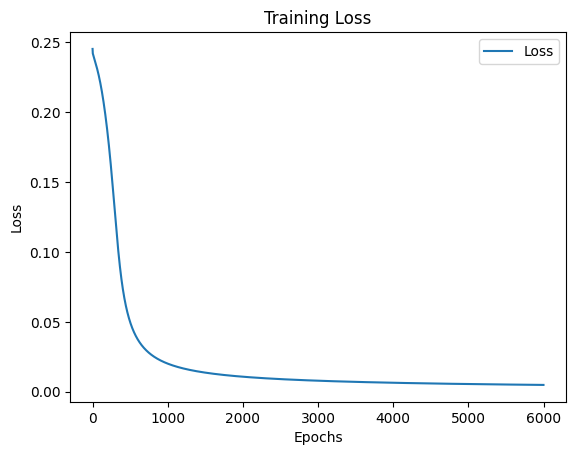

In [7]:
epochs = np.arange(len(loss))
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(epochs, loss,label="Loss")
plt.legend()
plt.show()

In [8]:
print(XOR_model.run([0,0]))
print(XOR_model.run([1,0]))
print(XOR_model.run([0,1]))
print(XOR_model.run([1,1]))

[[0.0650979]]
[[0.92536171]]
[[0.93212542]]
[[0.06933934]]


In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
def show_image(image):
  plt.figure()
  plt.imshow(image)
  plt.colorbar()
  plt.grid(False)
  plt.show()

In [11]:
lim = len(train_images)//1
train_y = [[0]*10 for i in range(lim)]


for i,num in enumerate(train_labels):
  train_y[i][num] = 1
  if i == lim-1:
    break
arr = []
for n in range(len(train_images)):
  arr.append(train_images[n].flatten())
  if n == lim-1:
    break
arr = np.array(arr)
train_y = np.array(train_y)

In [12]:
MNIST_model = Neural_Network(architecture=[784, 16, 16, 10], activations=[0,0,0])
#MNIST_model = Neural_Network(architecture=[784, 16, 16, 10], activations=[2,2,2])

loss = MNIST_model.train(arr,train_y, epochs=5100, alpha=0.95, stochastic_const=0.075, show_cost=True)
loss[-1]

Epoch 0: Average Cost = 6.749388872378261
Epoch 10: Average Cost = 2.536036300720644
Epoch 20: Average Cost = 1.6401063241117386


KeyboardInterrupt: 

In [ ]:
epochs = np.arange(len(loss))
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(epochs, loss)
plt.show()

# epochs = np.arange(len(loss))
# plt.title("Training Loss")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.plot(epochs, loss)
# plt.ylim(0.52, 0.57)
# plt.xlim(1000, 1200)
# plt.show()

NameError: name 'loss' is not defined

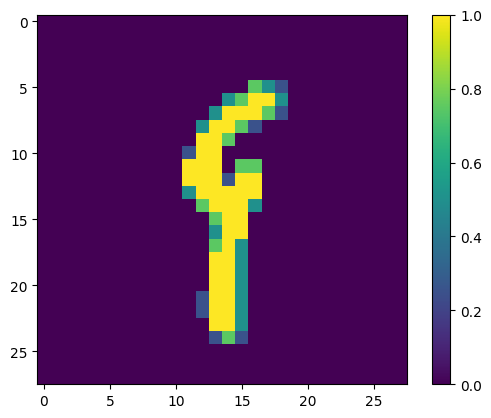

np.uint8(9)

In [13]:
n = 3005
show_image(test_images[n])
test_labels[n]

In [ ]:
np.argmax(new_model.run(test_images[n].flatten()))

8

In [ ]:
np.argmax(MNIST_model.run(test_images[n].flatten()))

1

In [ ]:
get_accuracy(MNIST_model, test_images, test_labels)

0.101

Save Weight and Bias data to drive

In [14]:
overwrite = False # precaution to not overwrite alr calculated weights by mistake
if overwrite:
  save_weights_biases(MNIST_model.W, MNIST_model.b, weights_path, biases_path)

In [15]:
weights, biases = load_weights_biases(weights_path, biases_path)

In [16]:
new_model = Neural_Network([784, 16, 16, 10])
new_model.set_params(weights, biases)

In [17]:
get_accuracy(new_model, test_images, test_labels)

0.8655